# Import data & Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
students = pd.read_csv("/content/drive/MyDrive/students_updated.csv")

In [ ]:
progress = pd.read_csv("/content/drive/MyDrive/progress.csv")

In [ ]:
feedbacks = pd.read_csv("/content/drive/MyDrive/feedback_updated.csv")

In [ ]:
enrollments = pd.read_csv("/content/drive/MyDrive/enrollments.csv")

In [ ]:
courses = pd.read_csv("/content/drive/MyDrive/courses_100_clean.csv")

In [ ]:
course_feedback = pd.read_excel("/content/drive/MyDrive/E_Learning.xls",sheet_name="CourseFeedback")

In [ ]:
students_progress = pd.read_excel("/content/drive/MyDrive/E_Learning.xls",sheet_name="StudentProgress")

#Data cleaning

In [ ]:
courses.head()

,CourseID,CourseName,Instructor,Category,DurationHrs,PriceUSD
0,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06
1,2,Python for Data Analysis,Kristina Davis,Data Science,13,76.59
2,3,Machine Learning with Scikit-Learn,Zachary Lopez,Data Science,41,151.52
3,4,Data Wrangling with Pandas,Mr. Jason Fletcher MD,Data Science,68,108.87
4,5,Data Visualization with Matplotlib,Susan Thomas,Data Science,98,103.00


In [ ]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CourseID     100 non-null    int64  
 1   CourseName   100 non-null    object 
 2   Instructor   100 non-null    object 
 3   Category     100 non-null    object 
 4   DurationHrs  100 non-null    int64  
 5   PriceUSD     100 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [ ]:
courses.describe()

,CourseID,DurationHrs,PriceUSD
count,100.000000,100.000000,100.000000
mean,50.500000,52.870000,139.956700
std,29.011492,27.690809,81.302878
min,1.000000,10.000000,21.060000
25%,25.750000,26.750000,77.107500
50%,50.500000,54.000000,123.975000
75%,75.250000,77.500000,199.135000
max,100.000000,100.000000,297.700000


In [ ]:
students.head()

,StudentID,Name,Age,Gender,JoinDate,Country
0,1,Kathy Ross,49,Female,10/13/2023,Tunisia
1,2,Nicholas Holt,38,Female,10/25/2024,Palestine
2,3,Erica Hall,44,Female,2/18/2024,Jordan
3,4,John Bell,37,Male,7/3/2024,Bahrain
4,5,Amber Figueroa,39,Female,11/10/2023,Qatar


In [ ]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   StudentID  500 non-null    int64 
 1   Name       500 non-null    object
 2   Age        500 non-null    int64 
 3   Gender     500 non-null    object
 4   JoinDate   500 non-null    object
 5   Country    500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [ ]:
students['Age'] = students['Age'].astype(float)

In [ ]:
students['JoinDate'] = pd.to_datetime(students['JoinDate'])

In [ ]:
students.describe()

,StudentID,Age,JoinDate
count,500.000000,500.000000,500
mean,250.500000,33.862000,2024-06-13 02:03:50.399999744
min,1.000000,18.000000,2023-06-03 00:00:00
25%,125.750000,25.000000,2023-12-09 18:00:00
50%,250.500000,34.000000,2024-06-14 00:00:00
75%,375.250000,42.000000,2024-12-17 06:00:00
max,500.000000,50.000000,2025-06-01 00:00:00
std,144.481833,9.583666,NaN


In [ ]:
feedbacks.head()

,FeedbackID,EnrollID,Rating,Comments,FeedbackDate
0,1,884,4,The duration is too short for the content.,4/30/2025
1,2,833,8,The course content needs improvement.,1/25/2025
2,3,500,3,The course did not meet my expectations.,7/8/2024
3,4,625,3,The instructor was great and the approach was ...,2/8/2025
4,5,186,8,I learned a lot from this course.,4/16/2025


In [ ]:
feedbacks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FeedbackID    500 non-null    int64 
 1   EnrollID      500 non-null    int64 
 2   Rating        500 non-null    int64 
 3   Comments      500 non-null    object
 4   FeedbackDate  500 non-null    object
dtypes: int64(3), object(2)
memory usage: 19.7+ KB


In [ ]:
feedbacks['FeedbackDate'] = pd.to_datetime(feedbacks['FeedbackDate'])

In [ ]:
feedbacks.describe()

,FeedbackID,EnrollID,Rating,FeedbackDate
count,500.000000,500.000000,500.000000,500
mean,250.500000,513.314000,5.522000,2024-12-10 10:22:04.800000
min,1.000000,2.000000,1.000000,2024-06-02 00:00:00
25%,125.750000,275.000000,3.000000,2024-09-11 00:00:00
50%,250.500000,536.000000,5.000000,2024-12-18 00:00:00
75%,375.250000,756.250000,8.000000,2025-03-07 06:00:00
max,500.000000,997.000000,10.000000,2025-06-02 00:00:00
std,144.481833,284.226058,2.861099,NaN


In [ ]:
enrollments.head()

,EnrollID,StudentID,CourseID,EnrollDate,CompletionStatus
0,1,195,45,2/28/2025,Completed
1,2,426,46,12/8/2024,Completed
2,3,303,43,3/23/2025,Completed
3,4,133,19,9/11/2024,In Progress
4,5,19,2,1/12/2025,Dropped


In [ ]:
enrollments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EnrollID          1000 non-null   int64 
 1   StudentID         1000 non-null   int64 
 2   CourseID          1000 non-null   int64 
 3   EnrollDate        1000 non-null   object
 4   CompletionStatus  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [ ]:
enrollments['EnrollDate']=pd.to_datetime(enrollments['EnrollDate'])

In [ ]:
enrollments.describe()

,EnrollID,StudentID,CourseID,EnrollDate
count,1000.000000,1000.00000,1000.000000,1000
mean,500.500000,247.61400,50.791000,2024-12-07 01:24:57.600000
min,1.000000,2.00000,1.000000,2024-06-03 00:00:00
25%,250.750000,120.00000,26.000000,2024-09-10 18:00:00
50%,500.500000,244.00000,52.000000,2024-12-07 00:00:00
75%,750.250000,372.25000,75.000000,2025-03-06 06:00:00
max,1000.000000,500.00000,100.000000,2025-06-02 00:00:00
std,288.819436,142.57745,29.010462,NaN


In [ ]:
progress.head()

,ProgressID,EnrollID,ProgressDate,ProgressPercent
0,1,451,7/26/2024,36.35
1,2,39,1/7/2025,89.29
2,3,797,6/29/2024,84.39
3,4,930,1/20/2025,67.71
4,5,911,4/11/2025,56.79


In [ ]:
progress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProgressID       10000 non-null  int64  
 1   EnrollID         10000 non-null  int64  
 2   ProgressDate     10000 non-null  object 
 3   ProgressPercent  10000 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 312.6+ KB


In [ ]:
progress['ProgressDate'] = pd.to_datetime(progress['ProgressDate'])

In [ ]:
progress.describe()

,ProgressID,EnrollID,ProgressDate,ProgressPercent
count,10000.00000,10000.000000,10000,10000.000000
mean,5000.50000,502.901000,2024-12-01 23:46:53.760000,50.438448
min,1.00000,1.000000,2024-06-02 00:00:00,0.000000
25%,2500.75000,255.000000,2024-09-02 00:00:00,25.680000
50%,5000.50000,502.000000,2024-12-03 00:00:00,50.785000
75%,7500.25000,754.000000,2025-03-02 00:00:00,75.460000
max,10000.00000,1000.000000,2025-06-02 00:00:00,100.000000
std,2886.89568,288.525964,NaN,28.852745


In [ ]:
enrollment_course = courses.merge(enrollments,on="CourseID",how="left")
enrollment_course

,CourseID,CourseName,Instructor,Category,DurationHrs,PriceUSD,EnrollID,StudentID,EnrollDate,CompletionStatus
0,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed
1,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,94,401,2024-08-11,Completed
2,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,144,243,2024-11-23,Completed
3,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,267,467,2024-08-28,Completed
4,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,384,324,2024-07-31,Dropped
...,...,...,...,...,...,...,...,...,...,...
995,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,467,264,2024-08-02,Dropped
996,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,660,264,2025-03-13,In Progress
997,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,770,120,2024-06-22,Completed
998,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,856,225,2025-03-31,Dropped


In [ ]:
course_progress=enrollment_course.merge(progress,on="EnrollID",how="inner")
course_progress

,CourseID,CourseName,Instructor,Category,DurationHrs,PriceUSD,EnrollID,StudentID,EnrollDate,CompletionStatus,ProgressID,ProgressDate,ProgressPercent
0,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed,1119,2024-06-12,80.31
1,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed,1358,2024-10-09,28.62
2,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed,2909,2024-10-21,74.91
3,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed,5055,2025-06-01,75.71
4,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,19,353,2024-07-06,Completed,6852,2024-12-06,69.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,972,436,2024-08-11,Dropped,3531,2024-07-04,76.96
9996,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,972,436,2024-08-11,Dropped,4037,2024-08-22,87.40
9997,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,972,436,2024-08-11,Dropped,7451,2024-12-16,91.32
9998,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,972,436,2024-08-11,Dropped,9174,2025-04-09,81.72


In [ ]:
course_feedback=enrollment_course.merge(feedbacks,on="EnrollID",how="inner")
course_feedback

,CourseID,CourseName,Instructor,Category,DurationHrs,PriceUSD,EnrollID,StudentID,EnrollDate,CompletionStatus,FeedbackID,Rating,Comments,FeedbackDate
0,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,144,243,2024-11-23,Completed,177,2,The course did not meet my expectations.,2024-10-10
1,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,451,53,2024-12-27,Completed,356,9,I learned a lot from this course.,2024-12-05
2,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,488,77,2024-12-13,In Progress,428,5,The duration is too short for the content.,2025-02-07
3,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,652,309,2024-11-05,Completed,487,2,I learned a lot from this course.,2025-04-14
4,1,Data Science for Beginners,Kelly Smith,Data Science,39,251.06,808,113,2024-07-12,Completed,472,2,Rich and very helpful content.,2025-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,464,71,2024-10-08,Completed,300,3,Clear explanation and excellent instructor.,2025-02-21
496,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,660,264,2025-03-13,In Progress,208,4,The course did not meet my expectations.,2024-07-04
497,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,770,120,2024-06-22,Completed,458,1,The course was a bit boring.,2024-09-30
498,100,Risk Management in Business,Wendy Richardson,Business,69,292.15,972,436,2024-08-11,Dropped,161,9,The instructor was great and the approach was ...,2025-03-22


In [ ]:
last_progress = progress.groupby(by = ['EnrollID'])['ProgressPercent'].max()

#Data exploration


#What is the largest country with students?

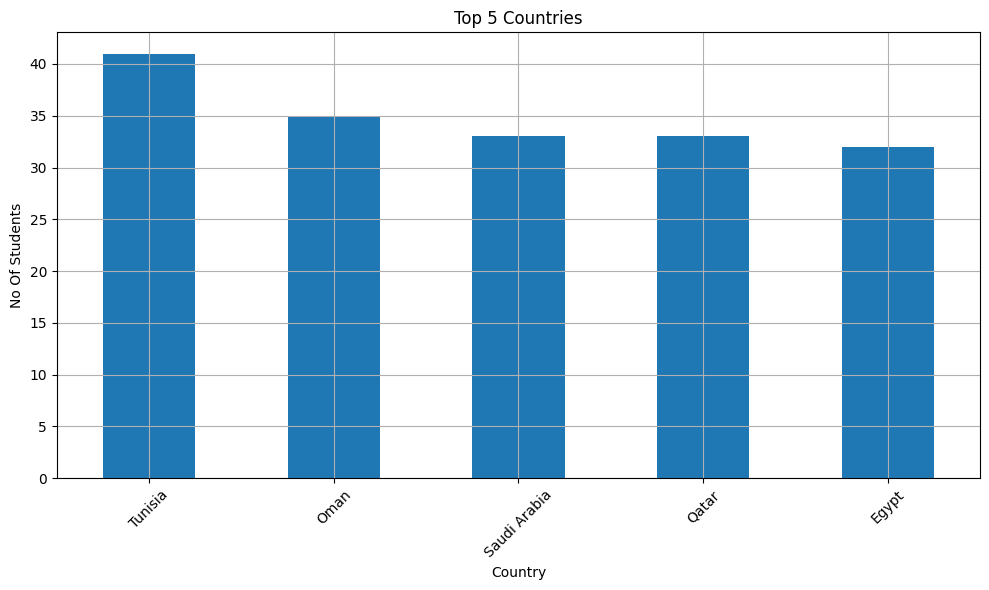

In [ ]:
plt.figure(figsize=(10,6))
students['Country'].value_counts().head(5).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('No Of Students')
plt.title(f'Top 5 Countries')
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()
plt.show()

#What are the most common comments among students?

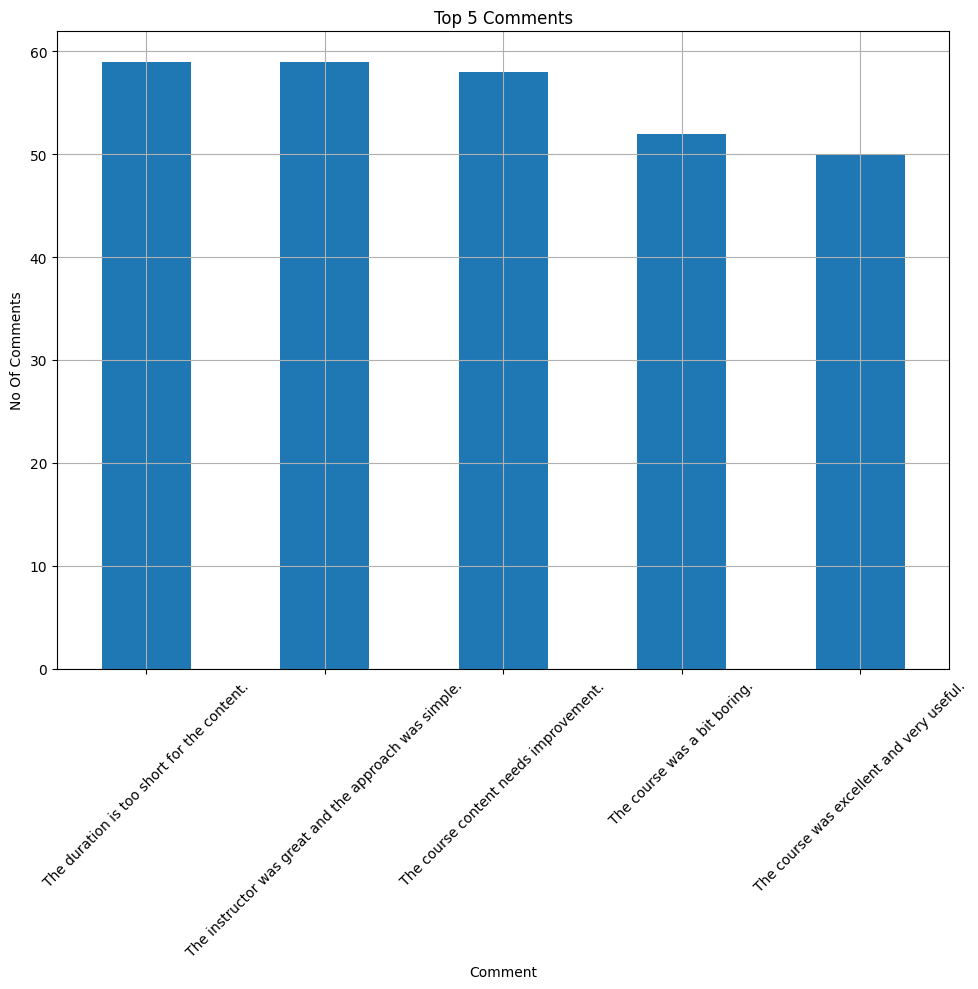

In [ ]:
plt.figure(figsize=(10,10))
feedbacks['Comments'].value_counts().head(5).plot(kind = 'bar')
plt.xlabel('Comment')
plt.ylabel('No Of Comments')
plt.title(f'Top 5 Comments')
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()
plt.show()

#Relationship between Rating and Duration

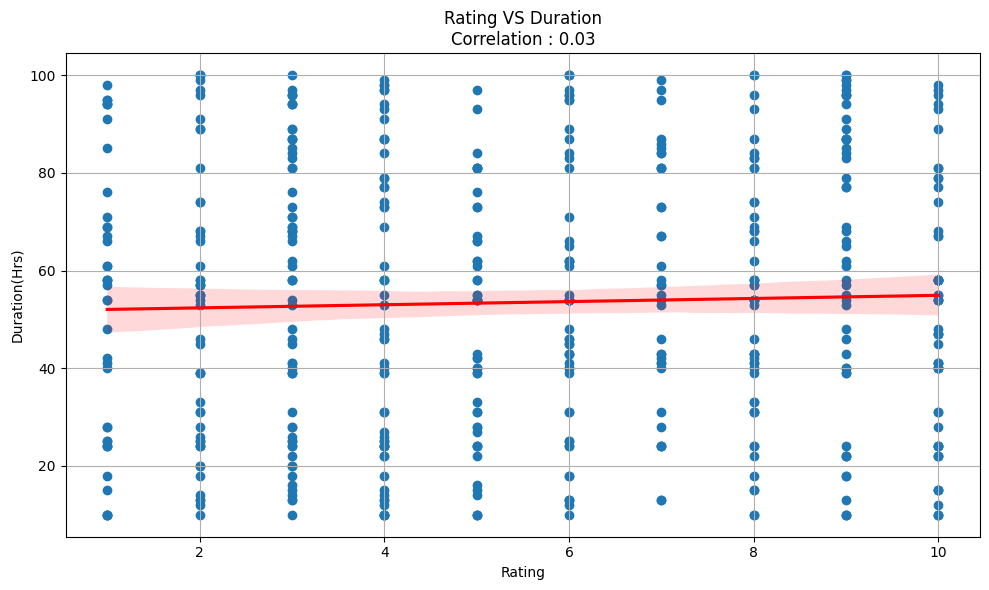

In [ ]:
Coor_1 = course_feedback['Rating'].corr(course_feedback['DurationHrs'])
plt.figure(figsize=(10,6))
plt.scatter(course_feedback['Rating'],course_feedback['DurationHrs'])
sns.regplot(data=course_feedback, x=course_feedback['Rating'], y=course_feedback['DurationHrs'], scatter=False, color='red')
plt.xlabel('Rating')
plt.ylabel('Duration(Hrs)')
plt.title(f'Rating VS Duration\nCorrelation : {Coor_1:.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()

#What is the average progress for each category?

In [ ]:
x = enrollment_course.merge(last_progress,on = ['EnrollID'],how = 'inner')

In [ ]:
x.groupby(by = "Category")['ProgressPercent'].mean().round(2)

,ProgressPercent
Category,
AI,90.42
Business,89.99
Data Science,89.74
Marketing,90.16
Web Development,89.40


In [ ]:
course_progress.groupby(by="Category")['ProgressPercent'].mean().round(2)

,ProgressPercent
Category,
AI,50.53
Business,50.45
Data Science,50.10
Marketing,50.90
Web Development,50.20


#Distribution of Rating

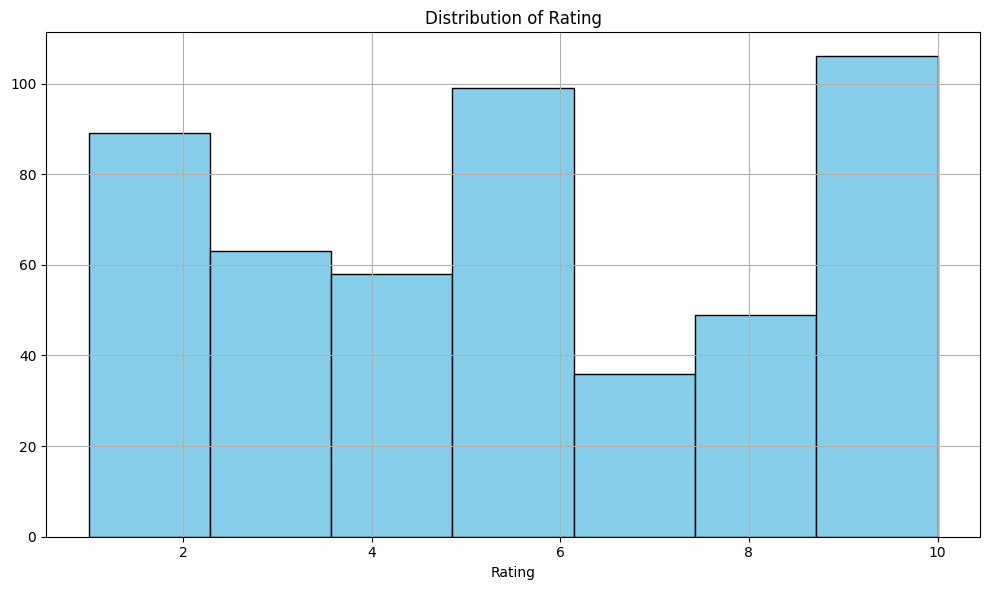

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(feedbacks['Rating'],bins=7,color="skyblue",edgecolor="black")
plt.xlabel('Rating')
plt.title('Distribution of Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

#What is Average Progress For each Month?

In [ ]:
progress["Month"] = progress['ProgressDate'].dt.month_name()

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
x = progress.groupby(by = "Month")["ProgressPercent"].mean()

In [ ]:
x = x.reindex(month_order)

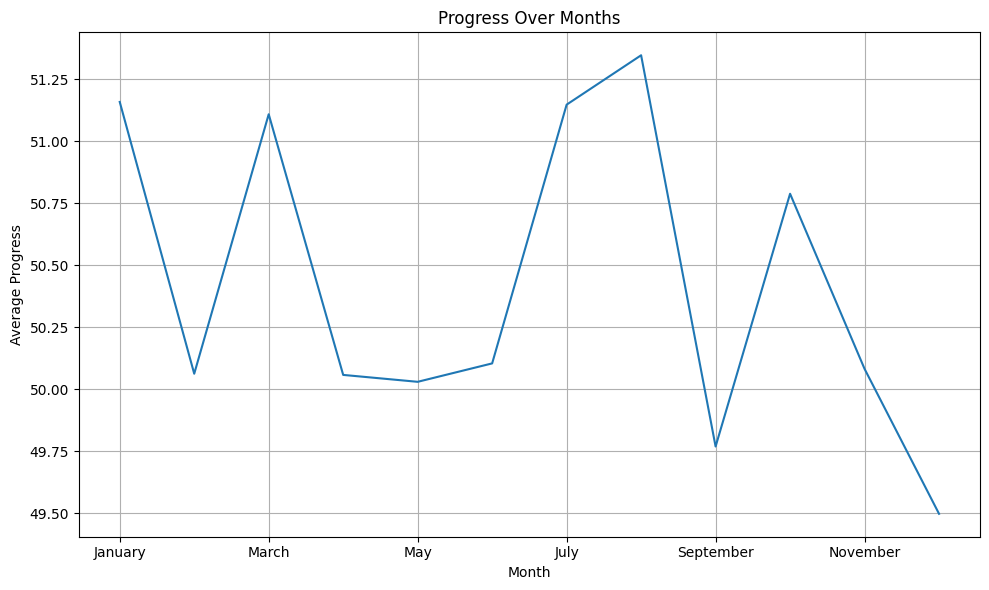

In [ ]:
plt.figure(figsize=(10,6))
x.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Progress')
plt.title('Progress Over Months')
plt.grid(True)
plt.tight_layout()
plt.show()

#Relationship between Price and Sales

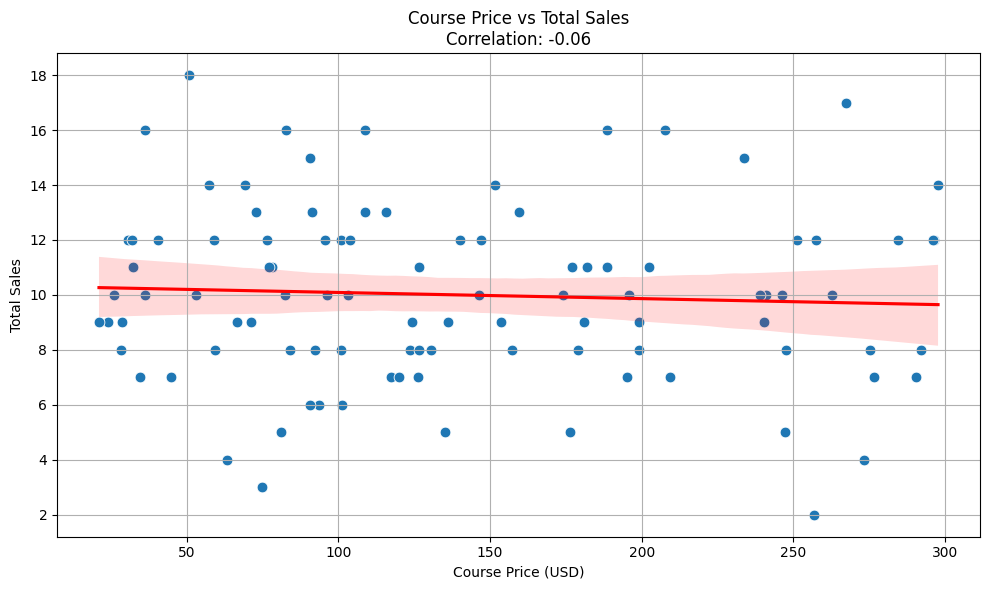

In [ ]:
df = enrollment_course.groupby(by=["CourseName", "PriceUSD"]) \
    .agg(total_sales=("CourseName", "count")) \
    .reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="PriceUSD", y="total_sales", s=60)

sns.regplot(data=df, x="PriceUSD", y="total_sales", scatter=False, color='red')

correlation = df["PriceUSD"].corr(df["total_sales"])
plt.title(f"Course Price vs Total Sales\nCorrelation: {correlation:.2f}")

plt.xlabel("Course Price (USD)")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


#Relationship between Duration and Progress Percent

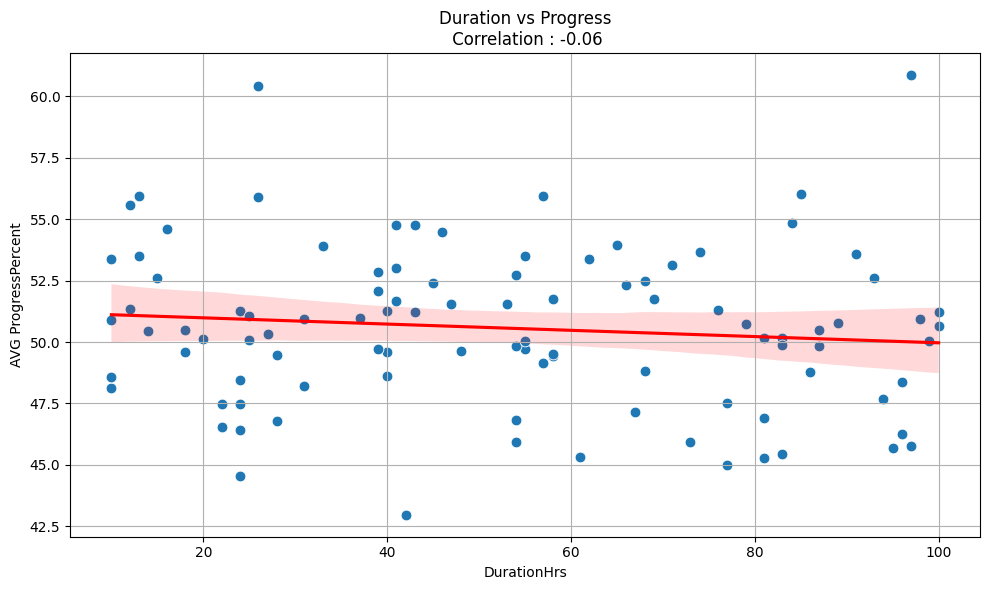

In [ ]:
df_1=course_progress.groupby(by=["CourseName","DurationHrs"])["ProgressPercent"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_1,x="DurationHrs",y = "ProgressPercent",s=60)

sns.regplot(data=df_1,x="DurationHrs",y = "ProgressPercent", scatter=False, color='red')

correlation_2 = df["PriceUSD"].corr(df["total_sales"])
plt.title(f"Duration vs Progress\n Correlation : {correlation_2:.2f}")

plt.xlabel("DurationHrs")
plt.ylabel("AVG ProgressPercent")
plt.grid(True)
plt.tight_layout()
plt.show()

#Frequency of Duration

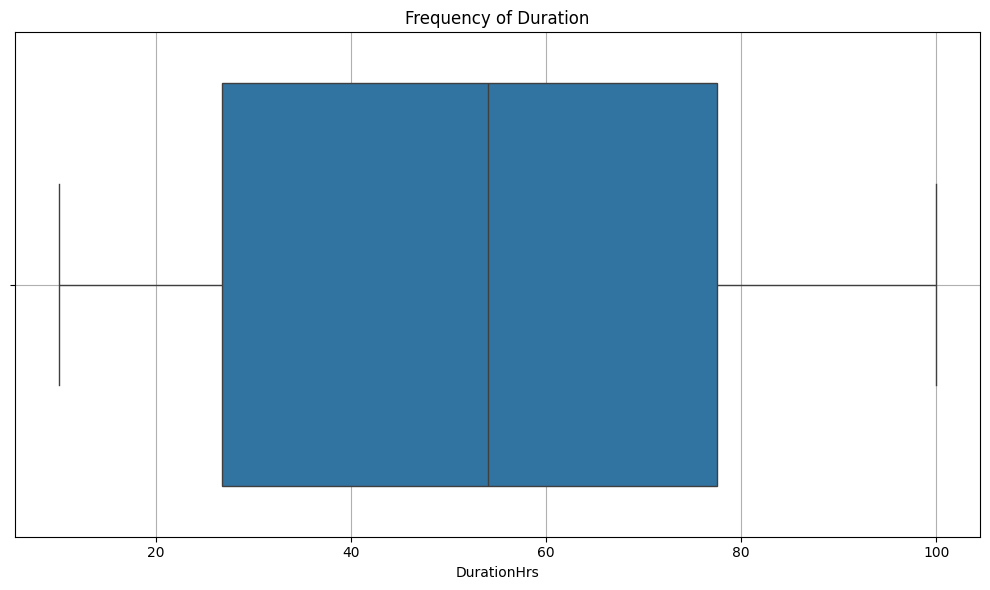

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = courses , x ="DurationHrs" )
plt.title(f"Frequency of Duration")
plt.xlabel("DurationHrs")
plt.grid(True)
plt.tight_layout()
plt.show()

#Frequency of Price

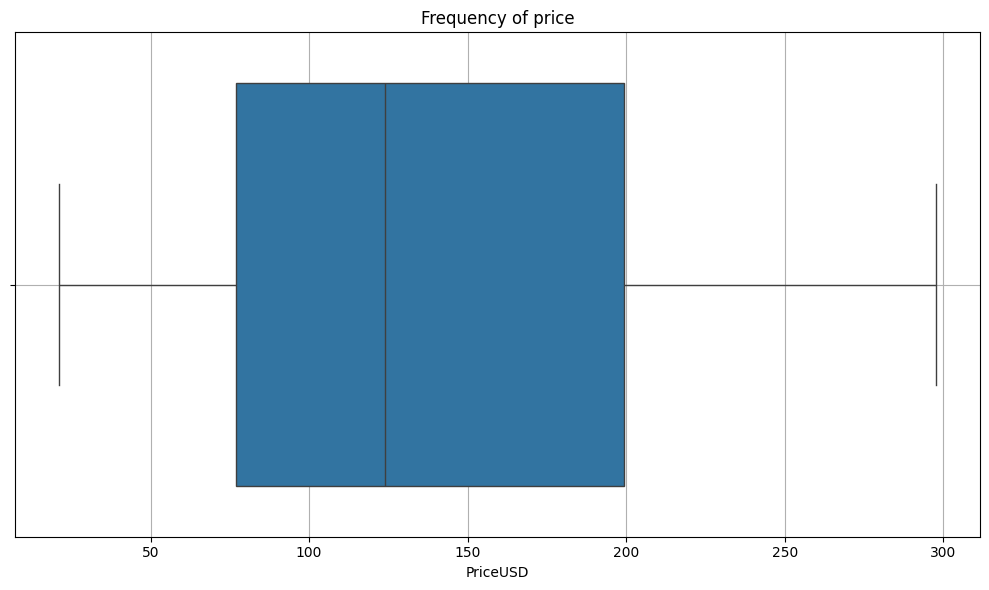

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data = courses , x = "PriceUSD")
plt.title(f"Frequency of price")
plt.xlabel("PriceUSD")
plt.grid(True)
plt.tight_layout()
plt.show()

#Frequency of Age

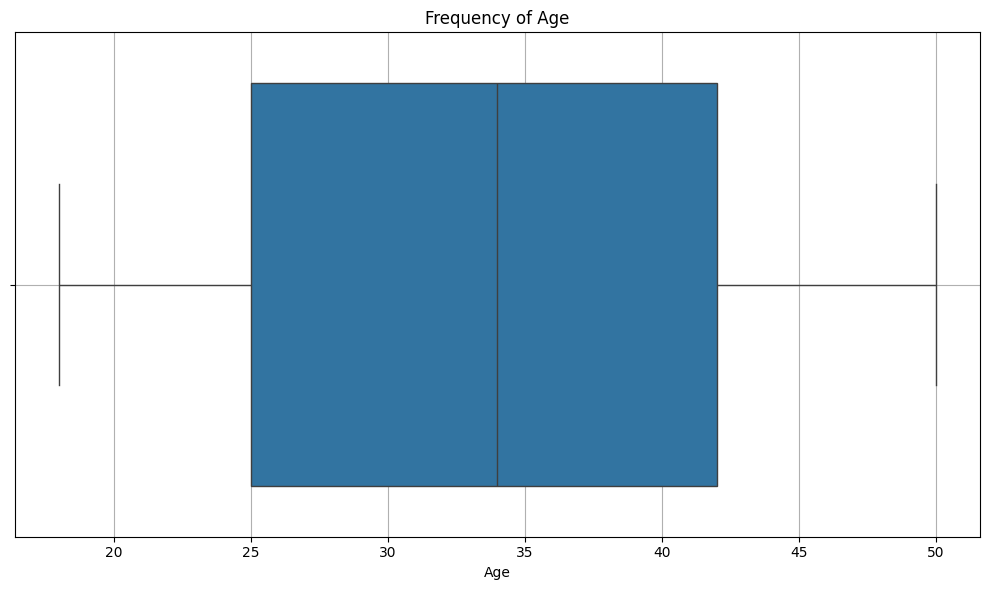

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot( data = students , x = 'Age')
plt.title(f"Frequency of Age")
plt.xlabel("Age")
plt.grid(True)
plt.tight_layout()
plt.show()